In [3]:
import pandas as pd
import numpy as np
# from pandas import Dataframe,Series
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
import calmap

from keras.layers import Input, Dense, Activation, LeakyReLU, Dropout
from keras import models
from keras.optimizers import RMSprop, Adam

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
# Retriving Dataset
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [5]:
df_confirmed.head()


Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/24/20  7/25/20  7/26/20  \
0        0        0        0        0  ...    35981    36036    36157   
1        0        0        0        0  ...     4570     4637     4763   
2        0        0        0        0  ...    26159    26764    27357   
3        0        0        0        0  ...      897      897      897   
4        0        0        0        0  ...      880      916      932   

   7/27/20  7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  8/2/20  
0    36263    36368    36471    36542    36675   36710   36710  
1     4880     4997     5105     5197     5276    5396    5519  
2    27973    28615    29229    29831    30394   30950   31465  
3      907      907      918      922      925     925     925  
4      950     1000     1078     1109     1148    1164    1199  

[5 rows x 198 columns]

In [6]:
df_confirmed[df_confirmed['Country/Region'] == 'Canada']

Province/State Country/Region      Lat      Long  1/22/20  \
35                     Alberta         Canada  53.9333 -116.5765        0   
36            British Columbia         Canada  53.7267 -127.6476        0   
37              Grand Princess         Canada   0.0000    0.0000        0   
38                    Manitoba         Canada  53.7609  -98.8139        0   
39               New Brunswick         Canada  46.5653  -66.4619        0   
40   Newfoundland and Labrador         Canada  53.1355  -57.6604        0   
41                 Nova Scotia         Canada  44.6820  -63.7443        0   
42                     Ontario         Canada  51.2538  -85.3232        0   
43        Prince Edward Island         Canada  46.5107  -63.4168        0   
44                      Quebec         Canada  52.9399  -73.5491        0   
45                Saskatchewan         Canada  52.9399 -106.4509        0   
231           Diamond Princess         Canada   0.0000    0.0000        0   
244      Northwest Territories         Canada  64.8255 -124.8457        0   
245                      Yukon         Canada  64.2823 -135.0000        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/24/20  7/25/20  \
35         0        0        0        0        0  ...    10086    10086   
36         0        0        0        0        0  ...     3392     3419   
37         0        0        0        0        0  ...       13       13   
38         0        0        0        0        0  ...      384      388   
39         0        0        0        0        0  ...      170      170   
40         0        0        0        0        0  ...      265      265   
41         0        0        0        0        0  ...     1067     1067   
42         0        0        0        1        1  ...    40341    40457   
43         0        0        0        0        0  ...       36       36   
44         0        0        0        0        0  ...    58243    58414   
45         0        0        0        0        0  ...     1099     1136   
231        0        0        0        0        0  ...        0        0   
244        0        0        0        0        0  ...        5        5   
245        0        0        0        0        0  ...       14       14   

     7/26/20  7/27/20  7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  8/2/20  
35     10086    10390    10470    10603    10716    10843   10843   10843  
36      3419     3500     3523     3562     3591     3641    3641    3641  
37        13       13       13       13       13       13      13      13  
38       394      400      405      407      409      415     417     435  
39       170      170      170      170      170      170     170     170  
40       266      266      266      266      266      266     266     266  
41      1067     1067     1067     1067     1067     1069    1069    1071  
42     40558    40673    40787    40873    40953    41178   41257   41333  
43        36       36       36       36       36       36      36      36  
44     58583    58728    58897    59073    59131    59312   59458   59599  
45      1178     1209     1218     1268     1306     1319    1334    1342  
231        0        0        0        0        0        0       0       0  
244        5        5        5        5        5        5       5       5  
245       14       14       14       14       14       14      14      14  

[14 rows x 198 columns]

In [7]:
# Depricated
# df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [8]:
df_covid19.head()

Country_Region          Last_Update      Lat     Long_  Confirmed  Deaths  \
0      Australia  2020-08-03 05:35:07 -25.0000  133.0000    18318.0   221.0   
1        Austria  2020-08-03 05:35:07  47.5162   14.5501    21304.0   718.0   
2         Canada  2020-08-03 05:35:07  60.0010  -95.0010   118768.0  8990.0   
3          China  2020-08-03 05:35:07  30.5928  114.3055    87985.0  4669.0   
4        Denmark  2020-08-03 05:35:07  56.2639    9.5018    14028.0   615.0   

   Recovered  Active  Incident_Rate  People_Tested  People_Hospitalized  \
0    10622.0  7475.0      71.949002            NaN                  NaN   
1    18984.0  1602.0     236.542903            NaN                  NaN   
2   103201.0  6578.0     313.738733            NaN                  NaN   
3    81018.0  2298.0       6.263721            NaN                  NaN   
4    12783.0   630.0     242.187644            NaN                  NaN   

   Mortality_Rate  UID ISO3  
0        1.206464   36  AUS  
1        3.370259   40  AUT  
2        7.569379  124  CAN  
3        5.306586  156  CHN  
4        4.384089  208  DNK

In [9]:
df_covid19 = df_covid19.drop(['People_Tested','People_Hospitalized','UID','ISO3','Mortality_Rate'],axis=1)

In [10]:
df_covid19.head()

Country_Region          Last_Update      Lat     Long_  Confirmed  Deaths  \
0      Australia  2020-08-03 05:35:07 -25.0000  133.0000    18318.0   221.0   
1        Austria  2020-08-03 05:35:07  47.5162   14.5501    21304.0   718.0   
2         Canada  2020-08-03 05:35:07  60.0010  -95.0010   118768.0  8990.0   
3          China  2020-08-03 05:35:07  30.5928  114.3055    87985.0  4669.0   
4        Denmark  2020-08-03 05:35:07  56.2639    9.5018    14028.0   615.0   

   Recovered  Active  Incident_Rate  
0    10622.0  7475.0      71.949002  
1    18984.0  1602.0     236.542903  
2   103201.0  6578.0     313.738733  
3    81018.0  2298.0       6.263721  
4    12783.0   630.0     242.187644

In [11]:
df_covid19[df_covid19['Confirmed'] > 100000]

Country_Region          Last_Update        Lat       Long_  Confirmed  \
2            Canada  2020-08-03 05:35:07  60.001000  -95.001000   118768.0   
6            France  2020-08-03 05:35:07  46.227600    2.213700   225198.0   
7           Germany  2020-08-03 05:35:07  51.165691   10.451526   211220.0   
10            Italy  2020-08-03 05:35:07  41.871900   12.567400   248070.0   
13           Russia  2020-08-03 05:35:07  61.524000  105.318800   849277.0   
16   United Kingdom  2020-08-03 05:35:07  55.000000   -3.000000   306319.0   
17               US  2020-08-03 05:35:07  40.000000 -100.000000  4667955.0   
18            Spain  2020-08-03 05:35:07  40.463667   -3.749220   288522.0   
19           Mexico  2020-08-03 05:35:07  23.634500 -102.552800   439046.0   
20            Chile  2020-08-03 05:35:07 -35.675100  -71.543000   359731.0   
21           Brazil  2020-08-03 05:35:07 -14.235000  -51.925300  2733677.0   
22             Peru  2020-08-03 05:35:07  -9.190000  -75.015200   428850.0   
23         Colombia  2020-08-03 05:35:07   4.570900  -74.297300   317651.0   
26            India  2020-08-03 05:35:07  20.593684   78.962880  1803695.0   
27         Pakistan  2020-08-03 05:35:07  30.375300   69.345100   280029.0   
34        Argentina  2020-08-03 05:35:07 -38.416100  -63.616700   201919.0   
39       Bangladesh  2020-08-03 05:35:07  23.685000   90.356300   240746.0   
95        Indonesia  2020-08-03 05:35:07  -0.789300  113.921300   111455.0   
96             Iran  2020-08-03 05:35:07  32.427908   53.688046   309437.0   
97             Iraq  2020-08-03 05:35:07  33.223191   43.679291   129151.0   
142     Philippines  2020-08-03 05:35:07  12.879721  121.774017   103185.0   
145           Qatar  2020-08-03 05:35:07  25.354800   51.183900   111107.0   
153    Saudi Arabia  2020-08-03 05:35:07  23.885942   45.079162   278835.0   
162    South Africa  2020-08-03 05:35:07 -30.559500   22.937500   511485.0   
176          Turkey  2020-08-03 05:35:07  38.963700   35.243300   232856.0   

       Deaths  Recovered     Active  Incident_Rate  
2      8990.0   103201.0     6578.0     313.738733  
6     30268.0    81764.0   113166.0     345.006716  
7      9154.0   192908.0     9158.0     252.100805  
10    35154.0   200460.0    12456.0     410.291928  
13    14104.0   648961.0   186212.0     581.957819  
16    46286.0     1444.0   258589.0     451.225557  
17   154860.0  1468689.0  2239709.0    1416.823281  
18    28445.0   150376.0   109702.0     617.096223  
19    47746.0   342527.0    48773.0     343.562208  
20     9608.0   332411.0    17712.0    1881.811399  
21    94104.0  2062876.0   576697.0    1286.076685  
22    19614.0   294187.0   115049.0    1300.655110  
23    10650.0   167239.0   139762.0     624.278687  
26    38135.0  1186203.0   579357.0     130.702121  
27     5984.0   248873.0    25172.0     126.771717  
34     3648.0    89026.0   109245.0     446.765192  
39     3154.0   136839.0   100753.0     146.181858  
95     5236.0    68975.0    37244.0      40.747852  
96    17190.0   268102.0    24145.0     368.408288  
97     4868.0    91886.0    32397.0     321.091405  
142    2059.0    65557.0    35569.0      94.163149  
145     177.0   107779.0     3151.0    3856.462552  
153    2917.0   240081.0    35837.0     800.930847  
162    8366.0   347227.0   155892.0     862.411562  
176    5728.0   216494.0    10634.0     276.095063

In [12]:
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
df_covid19["Active"] = df_covid19["Confirmed"]-df_covid19["Recovered"]-df_covid19["Deaths"]
# df_recovered = df_recovered.rename(columns={"Province/State":"state","Country/Region": "country"})

In [13]:
df_covid19.head()

country          Last_Update      Lat     Long_  Confirmed  Deaths  \
0  Australia  2020-08-03 05:35:07 -25.0000  133.0000    18318.0   221.0   
1    Austria  2020-08-03 05:35:07  47.5162   14.5501    21304.0   718.0   
2     Canada  2020-08-03 05:35:07  60.0010  -95.0010   118768.0  8990.0   
3      China  2020-08-03 05:35:07  30.5928  114.3055    87985.0  4669.0   
4    Denmark  2020-08-03 05:35:07  56.2639    9.5018    14028.0   615.0   

   Recovered  Active  Incident_Rate  
0    10622.0  7475.0      71.949002  
1    18984.0  1602.0     236.542903  
2   103201.0  6577.0     313.738733  
3    81018.0  2298.0       6.263721  
4    12783.0   630.0     242.187644

In [14]:
df_deaths.head()

state      country       Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0   NaN  Afghanistan  33.93911  67.709953        0        0        0        0   
1   NaN      Albania  41.15330  20.168300        0        0        0        0   
2   NaN      Algeria  28.03390   1.659600        0        0        0        0   
3   NaN      Andorra  42.50630   1.521800        0        0        0        0   
4   NaN       Angola -11.20270  17.873900        0        0        0        0   

   1/26/20  1/27/20  ...  7/24/20  7/25/20  7/26/20  7/27/20  7/28/20  \
0        0        0  ...     1225     1248     1259     1269     1270   
1        0        0  ...      128      134      138      144      148   
2        0        0  ...     1136     1146     1155     1163     1174   
3        0        0  ...       52       52       52       52       52   
4        0        0  ...       35       39       40       41       47   

   7/29/20  7/30/20  7/31/20  8/1/20  8/2/20  
0     1271     1271     1272    1283    1284  
1      150      154      157     161     166  
2     1186     1200     1210    1223    1231  
3       52       52       52      52      52  
4       48       51       52      54      55  

[5 rows x 198 columns]

In [15]:
# Changing the conuntry names as required by pycountry_convert Lib
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_covid19.loc[df_covid19['country'] == "US", "country"] = "USA"
df_table.loc[df_table['Country_Region'] == "US", "Country_Region"] = "USA"
# df_recovered.loc[df_recovered['country'] == "US", "country"] = "USA"


df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_covid19.loc[df_covid19['country'] == "Korea, South", "country"] = "South Korea"
df_table.loc[df_table['Country_Region'] == "Korea, South", "Country_Region"] = "South Korea"
# df_recovered.loc[df_recovered['country'] == 'Korea, South', "country"] = 'South Korea'

df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_covid19.loc[df_covid19['country'] == "Taiwan*", "country"] = "Taiwan"
df_table.loc[df_table['Country_Region'] == "Taiwan*", "Country_Region"] = "Taiwan"
# df_recovered.loc[df_recovered['country'] == 'Taiwan*', "country"] = 'Taiwan'

df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Kinshasa)", "Country_Region"] = "Democratic Republic of the Congo"
# df_recovered.loc[df_recovered['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_table.loc[df_table['Country_Region'] == "Cote d'Ivoire", "Country_Region"] = "Côte d'Ivoire"
# df_recovered.loc[df_recovered['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['country'] == "Reunion", "country"] = "Réunion"
df_covid19.loc[df_covid19['country'] == "Reunion", "country"] = "Réunion"
df_table.loc[df_table['Country_Region'] == "Reunion", "Country_Region"] = "Réunion"
# df_recovered.loc[df_recovered['country'] == "Reunion", "country"] = "Réunion"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Brazzaville)", "Country_Region"] = "Republic of the Congo"
# df_recovered.loc[df_recovered['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_covid19.loc[df_covid19['country'] == "Bahamas, The", "country"] = "Bahamas"
df_table.loc[df_table['Country_Region'] == "Bahamas, The", "Country_Region"] = "Bahamas"
# df_recovered.loc[df_recovered['country'] == 'Bahamas, The', "country"] = 'Bahamas'

df_confirmed.loc[df_confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
df_covid19.loc[df_covid19['country'] == "Gambia, The", "country"] = "Gambia"
df_table.loc[df_table['Country_Region'] == "Gambia", "Country_Region"] = "Gambia"
# df_recovered.loc[df_recovered['country'] == 'Gambia, The', "country"] = 'Gambia'

# getting all countries
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_covid19["country"])
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting Continent Information
df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
df_table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in df_table["Country_Region"].values])
# df_recovered.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]] )   

In [16]:
df_confirmed.head()

state      country continent       Lat       Long  1/22/20  1/23/20  \
0   NaN  Afghanistan      Asia  33.93911  67.709953        0        0   
1   NaN      Albania    Europe  41.15330  20.168300        0        0   
2   NaN      Algeria    Africa  28.03390   1.659600        0        0   
3   NaN      Andorra    Europe  42.50630   1.521800        0        0   
4   NaN       Angola    Africa -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  ...  7/24/20  7/25/20  7/26/20  7/27/20  \
0        0        0        0  ...    35981    36036    36157    36263   
1        0        0        0  ...     4570     4637     4763     4880   
2        0        0        0  ...    26159    26764    27357    27973   
3        0        0        0  ...      897      897      897      907   
4        0        0        0  ...      880      916      932      950   

   7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  8/2/20  
0    36368    36471    36542    36675   36710   36710  
1     4997     5105     5197     5276    5396    5519  
2    28615    29229    29831    30394   30950   31465  
3      907      918      922      925     925     925  
4     1000     1078     1109     1148    1164    1199  

[5 rows x 199 columns]

In [17]:
df_deaths.head()

state      country continent       Lat       Long  1/22/20  1/23/20  \
0   NaN  Afghanistan      Asia  33.93911  67.709953        0        0   
1   NaN      Albania    Europe  41.15330  20.168300        0        0   
2   NaN      Algeria    Africa  28.03390   1.659600        0        0   
3   NaN      Andorra    Europe  42.50630   1.521800        0        0   
4   NaN       Angola    Africa -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  ...  7/24/20  7/25/20  7/26/20  7/27/20  \
0        0        0        0  ...     1225     1248     1259     1269   
1        0        0        0  ...      128      134      138      144   
2        0        0        0  ...     1136     1146     1155     1163   
3        0        0        0  ...       52       52       52       52   
4        0        0        0  ...       35       39       40       41   

   7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  8/2/20  
0     1270     1271     1271     1272    1283    1284  
1      148      150      154      157     161     166  
2     1174     1186     1200     1210    1223    1231  
3       52       52       52       52      52      52  
4       47       48       51       52      54      55  

[5 rows x 199 columns]

In [18]:
df_covid19.head()

country      continent          Last_Update      Lat     Long_  \
0  Australia      Australia  2020-08-03 05:35:07 -25.0000  133.0000   
1    Austria         Europe  2020-08-03 05:35:07  47.5162   14.5501   
2     Canada  North America  2020-08-03 05:35:07  60.0010  -95.0010   
3      China           Asia  2020-08-03 05:35:07  30.5928  114.3055   
4    Denmark         Europe  2020-08-03 05:35:07  56.2639    9.5018   

   Confirmed  Deaths  Recovered  Active  Incident_Rate  
0    18318.0   221.0    10622.0  7475.0      71.949002  
1    21304.0   718.0    18984.0  1602.0     236.542903  
2   118768.0  8990.0   103201.0  6577.0     313.738733  
3    87985.0  4669.0    81018.0  2298.0       6.263721  
4    14028.0   615.0    12783.0   630.0     242.187644

In [19]:
df_table.head()

Country_Region continent Last_Update  Confirmed  Deaths  Recovered  Active  \
0    Afghanistan      Asia  2020-01-22          0       0        NaN     NaN   
1    Afghanistan      Asia  2020-01-23          0       0        NaN     NaN   
2    Afghanistan      Asia  2020-01-24          0       0        NaN     NaN   
3    Afghanistan      Asia  2020-01-25          0       0        NaN     NaN   
4    Afghanistan      Asia  2020-01-26          0       0        NaN     NaN   

   Delta_Confirmed  Delta_Recovered  Incident_Rate  People_Tested  \
0              0.0              NaN            0.0            NaN   
1              0.0              NaN            0.0            NaN   
2              0.0              NaN            0.0            NaN   
3              0.0              NaN            0.0            NaN   
4              0.0              NaN            0.0            NaN   

   People_Hospitalized Province_State  FIPS  UID iso3 Report_Date_String  \
0                  NaN            NaN   NaN    4  AFG         2020/01/22   
1                  NaN            NaN   NaN    4  AFG         2020/01/23   
2                  NaN            NaN   NaN    4  AFG         2020/01/24   
3                  NaN            NaN   NaN    4  AFG         2020/01/25   
4                  NaN            NaN   NaN    4  AFG         2020/01/26   

   Delta_Deaths  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [20]:
df_table = df_table[df_table["continent"] != "Others"]

In [21]:
df_deaths[df_deaths["continent" ]== 'Others']

state             country continent        Lat        Long  1/22/20  \
88    NaN    Diamond Princess    Others   0.000000    0.000000        0   
127   NaN            Holy See    Others  41.902900   12.453400        0   
236   NaN         Timor-Leste    Others  -8.874217  125.727539        0   
240   NaN  West Bank and Gaza    Others  31.952200   35.233200        0   
246   NaN              Kosovo    Others  42.602636   20.902977        0   
247   NaN               Burma    Others  21.916200   95.956000        0   
251   NaN          MS Zaandam    Others   0.000000    0.000000        0   
260   NaN      Western Sahara    Others  24.215500  -12.885800        0   

     1/23/20  1/24/20  1/25/20  1/26/20  ...  7/24/20  7/25/20  7/26/20  \
88         0        0        0        0  ...       13       13       13   
127        0        0        0        0  ...        0        0        0   
236        0        0        0        0  ...        0        0        0   
240        0        0        0        0  ...       70       75       76   
246        0        0        0        0  ...      164      169      177   
247        0        0        0        0  ...        6        6        6   
251        0        0        0        0  ...        2        2        2   
260        0        0        0        0  ...        1        1        1   

     7/27/20  7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  8/2/20  
88        13       13       13       13       13      13      13  
127        0        0        0        0        0       0       0  
236        0        0        0        0        0       0       0  
240       78       79       80       81       82      83      84  
246      185      192      196      212      212     212     249  
247        6        6        6        6        6       6       6  
251        2        2        2        2        2       2       2  
260        1        1        1        1        1       1       1  

[8 rows x 199 columns]

In [22]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

In [23]:
df_deaths.head()

state      country continent       Lat       Long  1/22/20  1/23/20  \
0        Afghanistan      Asia  33.93911  67.709953        0        0   
1            Albania    Europe  41.15330  20.168300        0        0   
2            Algeria    Africa  28.03390   1.659600        0        0   
3            Andorra    Europe  42.50630   1.521800        0        0   
4             Angola    Africa -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  ...  7/24/20  7/25/20  7/26/20  7/27/20  \
0        0        0        0  ...     1225     1248     1259     1269   
1        0        0        0  ...      128      134      138      144   
2        0        0        0  ...     1136     1146     1155     1163   
3        0        0        0  ...       52       52       52       52   
4        0        0        0  ...       35       39       40       41   

   7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  8/2/20  
0     1270     1271     1271     1272    1283    1284  
1      148      150      154      157     161     166  
2     1174     1186     1200     1210    1223    1231  
3       52       52       52       52      52      52  
4       47       48       51       52      54      55  

[5 rows x 199 columns]

In [24]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days


out = ""#+"output/"

In [25]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','continent','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)

df_continents_cases = df_covid19.copy().drop(['Lat','Long_','country','Last_Update'],axis =1)
df_continents_cases = df_continents_cases.groupby(["continent"]).sum()

df_countries_cases.fillna(0,inplace=True)
df_continents_cases.fillna(0,inplace=True)

In [26]:
df_t = pd.DataFrame(pd.to_numeric(df_countries_cases.sum()),dtype=np.float64).transpose()

In [27]:
df_t

Confirmed    Deaths   Recovered     Active  Incident_Rate
0  18080067.0  689370.0  10691528.0  6598880.0   56284.331901

In [28]:
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["Deaths"]/df_t["Confirmed"],2)

In [29]:
df_t

Confirmed    Deaths   Recovered     Active  Incident_Rate  \
0  18080067.0  689370.0  10691528.0  6598880.0   56284.331901   

   Mortality Rate (per 100)  
0                      3.81

In [30]:
df_t.style.background_gradient(cmap='Reds',axis=1).format("{:.2f}").format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

In [31]:
df_continents_cases["Mortality Rate (per 100)"] = np.round(100*df_continents_cases["Deaths"]/df_continents_cases["Confirmed"],2)
df_continents_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

In [32]:
df_countries_cases["Mortality Rate (per 100)"] = np.round(100*df_countries_cases["Deaths"]/df_countries_cases["Confirmed"],2)
df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

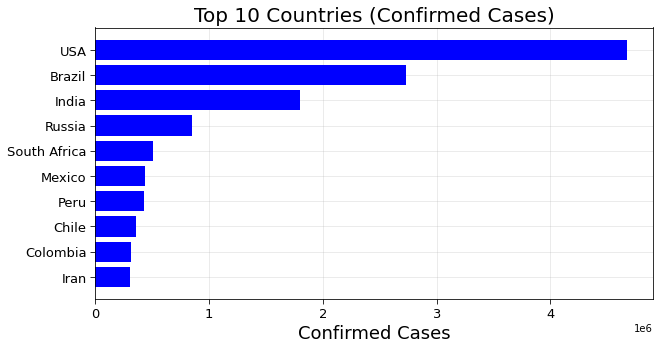

In [33]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="Blue")
plt.tick_params(size=5,labelsize = 13)
# me.set_xticks([500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000])
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig(out+'Top 10 Countries (Confirmed Cases).png')

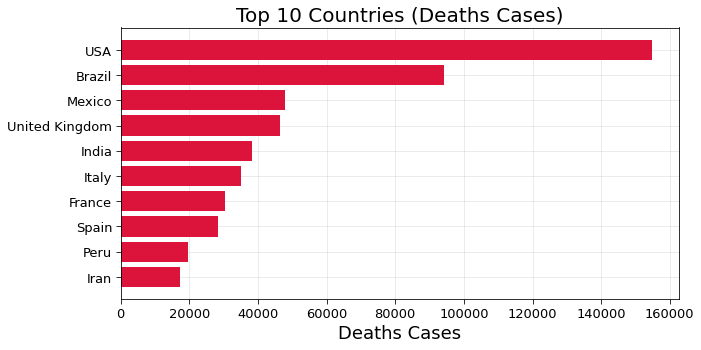

In [34]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')
plt.savefig(out+'Top 10 Countries (Deaths Cases).png')

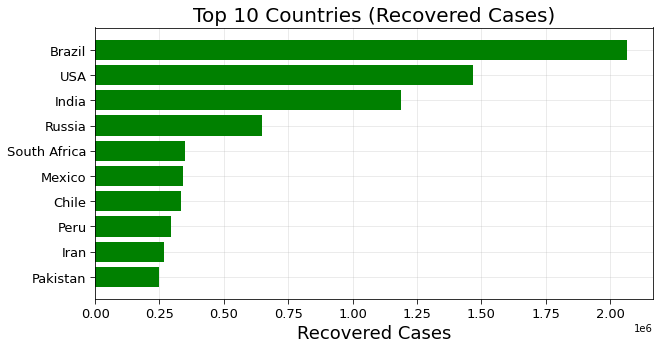

In [35]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Recovered')["Recovered"].index[-10:],df_countries_cases.sort_values('Recovered')["Recovered"].values[-10:],color="Green")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')
plt.savefig(out+'Top 10 Countries (Recovered Cases).png')

In [36]:
df_countries_cases.iloc[:,:].corr().style.background_gradient(cmap='Reds').format("{:.3f}")

In [37]:
df_continents_cases.iloc[:,:].corr().style.background_gradient(cmap='Reds').format("{:.3f}")

In [38]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map

In [39]:
temp_df = pd.DataFrame(df_countries_cases['Confirmed'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["Confirmed"]), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Confirmed"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Confirmed Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Confirmed Cases(Log Scale)",colorscale="Blues")
# fig.to_image("Global Heat Map confirmed.png")
fig.show()

In [40]:
temp_df = pd.DataFrame(df_countries_cases['Deaths'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["Deaths"]), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Deaths"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Death Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Death Cases(Log Scale)",colorscale="Reds")
# fig.to_image("Global Heat Map deaths.png")
fig.show()

In [41]:
temp_df = pd.DataFrame(df_countries_cases['Recovered'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["Recovered"]), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Recovered"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Recovered Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Recovered Cases(Log Scale)",colorscale="Greens")
# fig.to_image("Global Heat Map deaths.png")
fig.show()

In [42]:
case_nums_country = df_confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)

In [43]:
case_nums_country

1/22/20      6
1/23/20      8
1/24/20      9
1/25/20     11
1/26/20     13
          ... 
7/29/20    188
7/30/20    188
7/31/20    188
8/1/20     188
8/2/20     188
Length: 194, dtype: int64

In [44]:
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

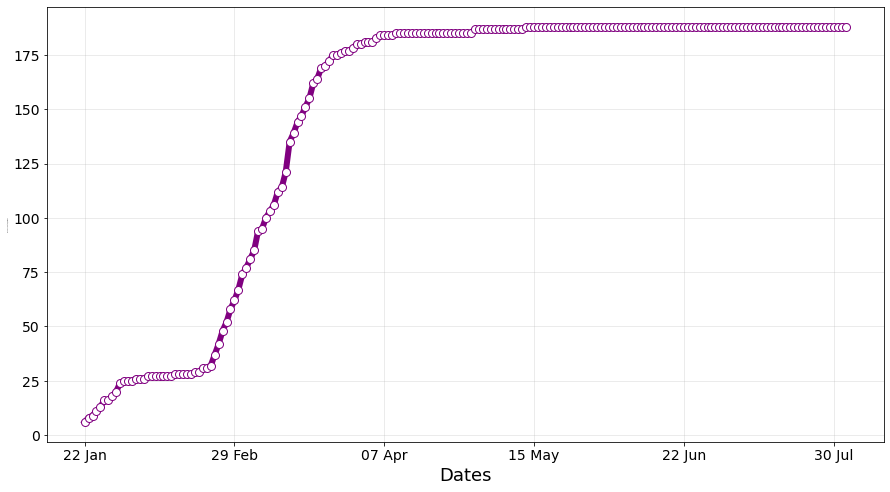

In [45]:
f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="purple",linewidth=6, linestyle='-', marker='o',markersize=8, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries/Regions",fontsize=1)
plt.grid(alpha = 0.3)

plt.savefig(out+'spread.png')
plt.show()
plt.close()

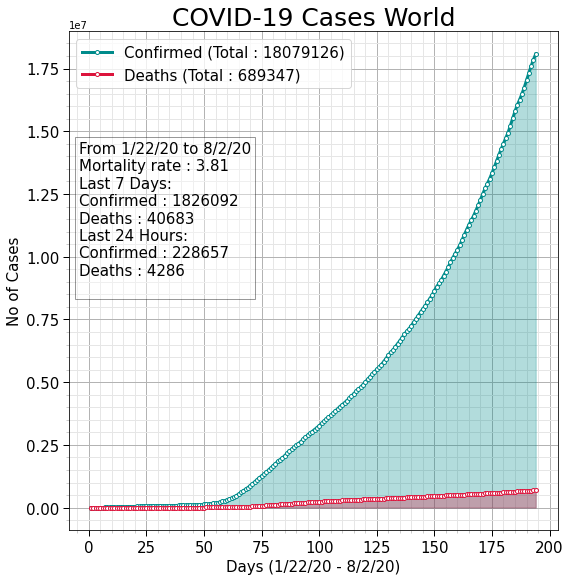

In [46]:
cols = 1
rows = 1
f = plt.figure(figsize=(10,10*rows))

visualize_covid_cases(df_confirmed, df_deaths,continent = "All",figure = [f,rows,cols, 1])

plt.savefig(out+'COIVD-19-World.png')
plt.show()

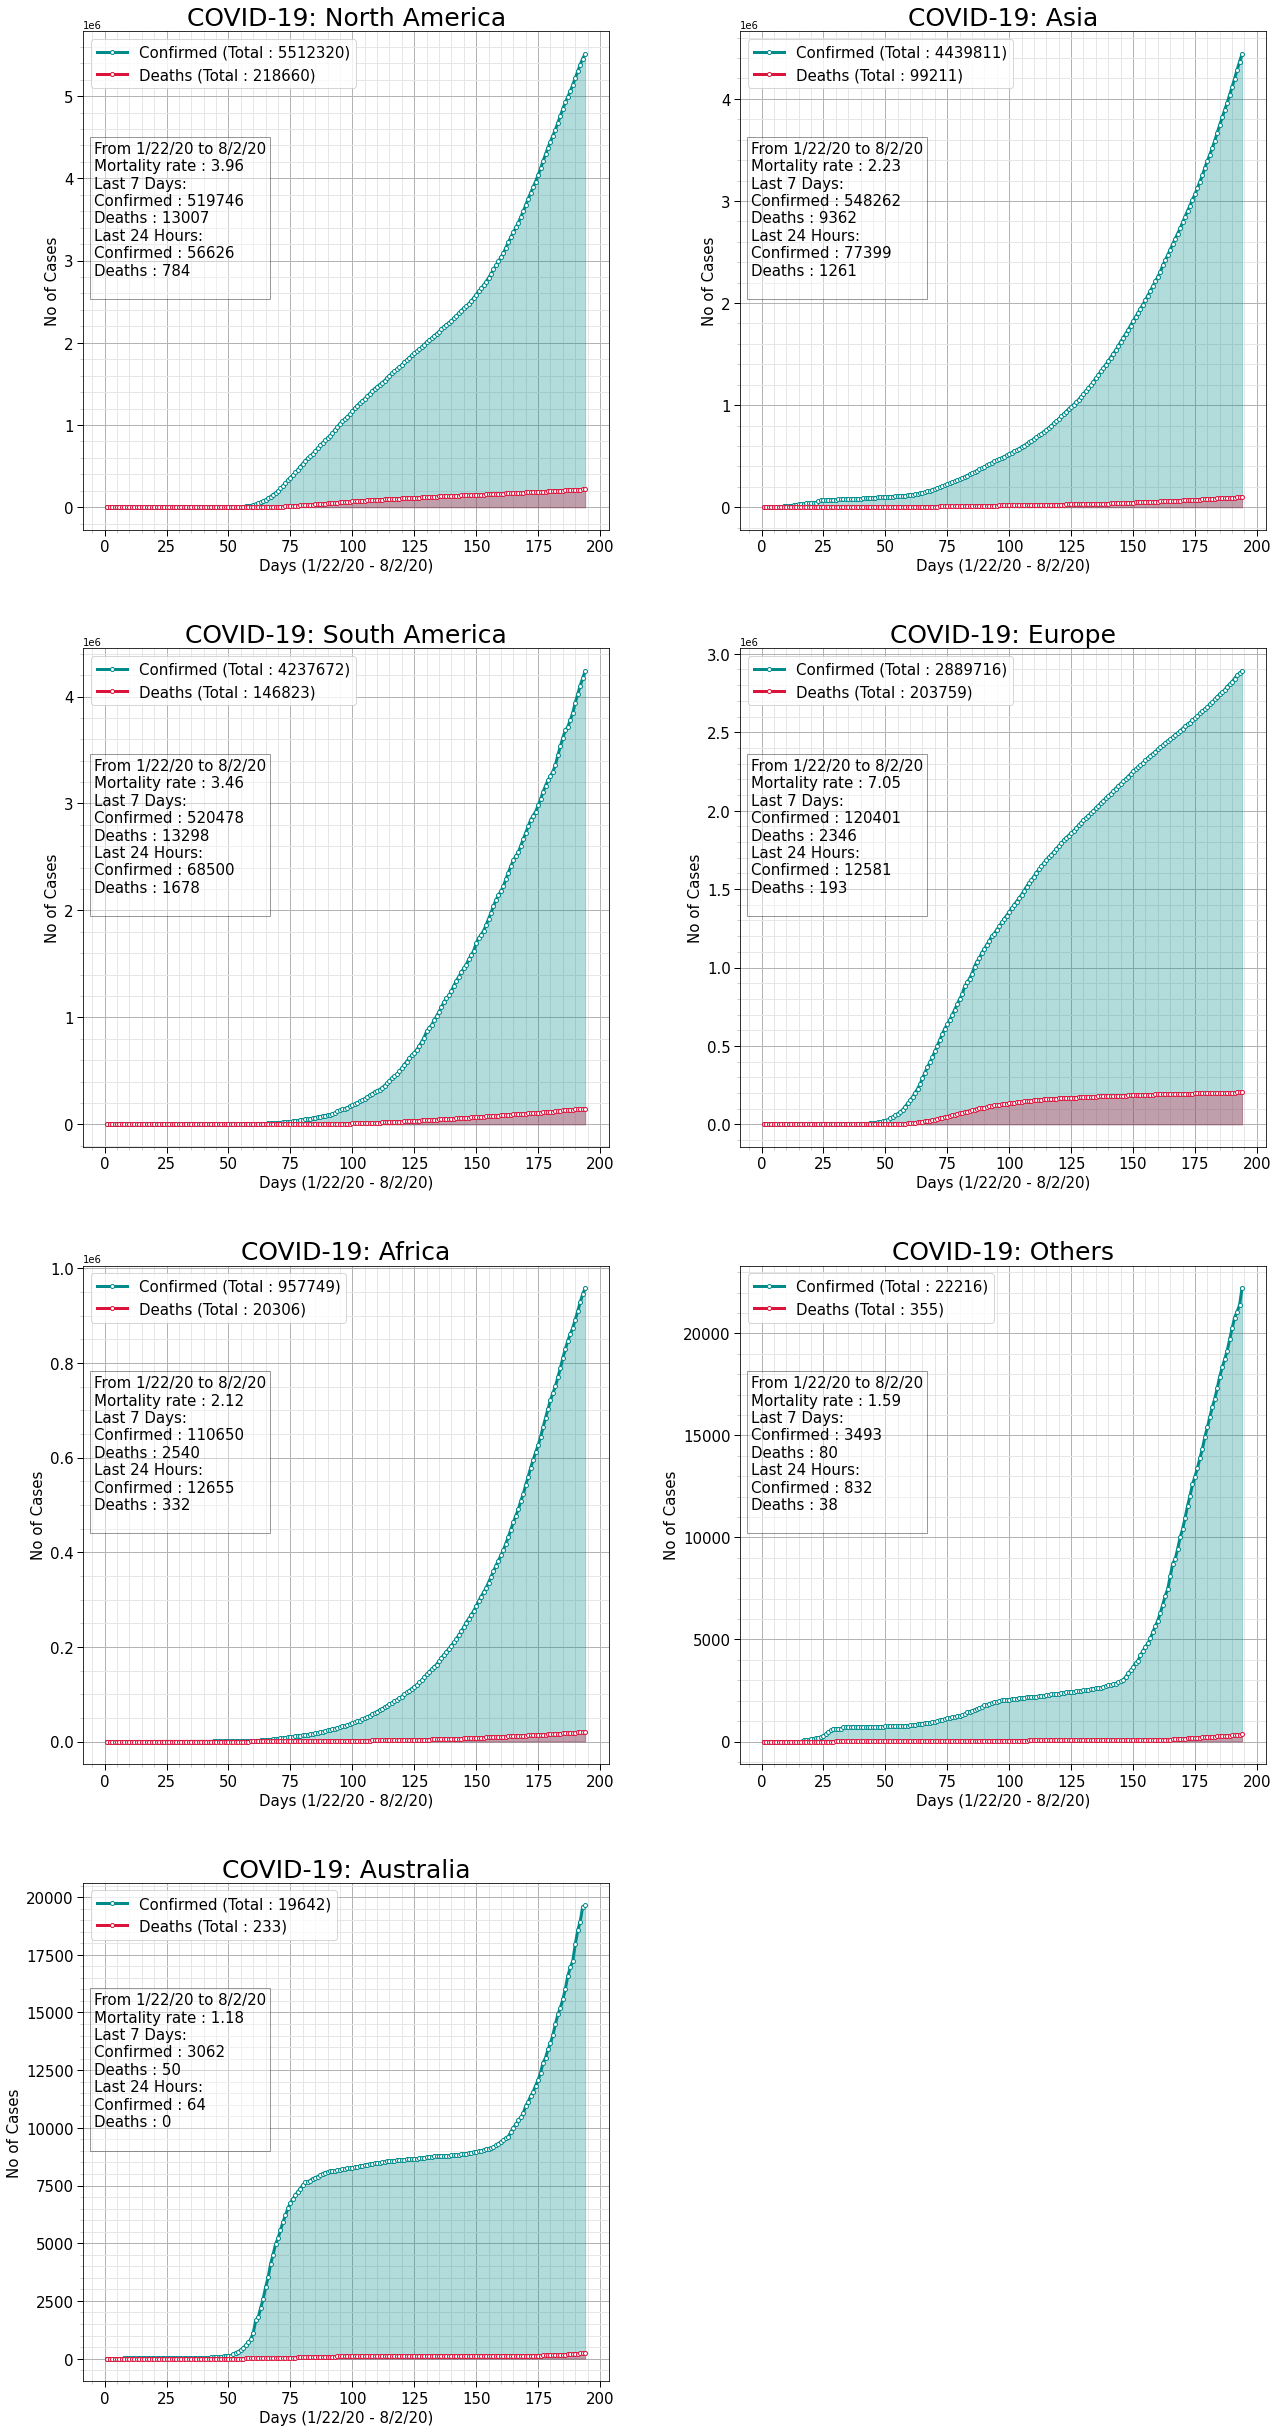

In [47]:
df_continents= df_confirmed.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index

cols =2
rows = int(np.ceil(continents.shape[0]/cols))
f = plt.figure(figsize=(20,9*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases(df_confirmed, df_deaths, continent = continent,figure = [f,rows,cols, i+1])

plt.show()

In [48]:
df_countries = df_confirmed.groupby(["country"]).sum()

In [49]:
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending = False)

In [50]:
df_confirmed.head(2)

state      country continent       Lat       Long  1/22/20  1/23/20  \
0        Afghanistan      Asia  33.93911  67.709953        0        0   
1            Albania    Europe  41.15330  20.168300        0        0   

   1/24/20  1/25/20  1/26/20  ...  7/24/20  7/25/20  7/26/20  7/27/20  \
0        0        0        0  ...    35981    36036    36157    36263   
1        0        0        0  ...     4570     4637     4763     4880   

   7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  8/2/20  
0    36368    36471    36542    36675   36710   36710  
1     4997     5105     5197     5276    5396    5519  

[2 rows x 199 columns]

In [51]:
cont = df_confirmed[df_confirmed['continent'] == 'Africa']

In [52]:
cont = cont.groupby('country').sum()

In [53]:
cont = cont.sort_values(cont.columns[-1],ascending = False)

In [54]:
Top5africa = cont[:5].index

In [55]:
Top5africa

Index(['South Africa', 'Egypt', 'Nigeria', 'Ghana', 'Algeria'], dtype='object', name='country')

In [56]:
int(np.ceil(Top5africa.shape[0]/2))

3

In [57]:
countries = df_countries[df_countries[df_countries.columns[-1]] >= 15000].index

In [58]:
countries = countries[:10]

In [59]:
countries

Index(['USA', 'Brazil', 'India', 'Russia', 'South Africa', 'Mexico', 'Peru',
       'Chile', 'Colombia', 'Iran'],
      dtype='object', name='country')

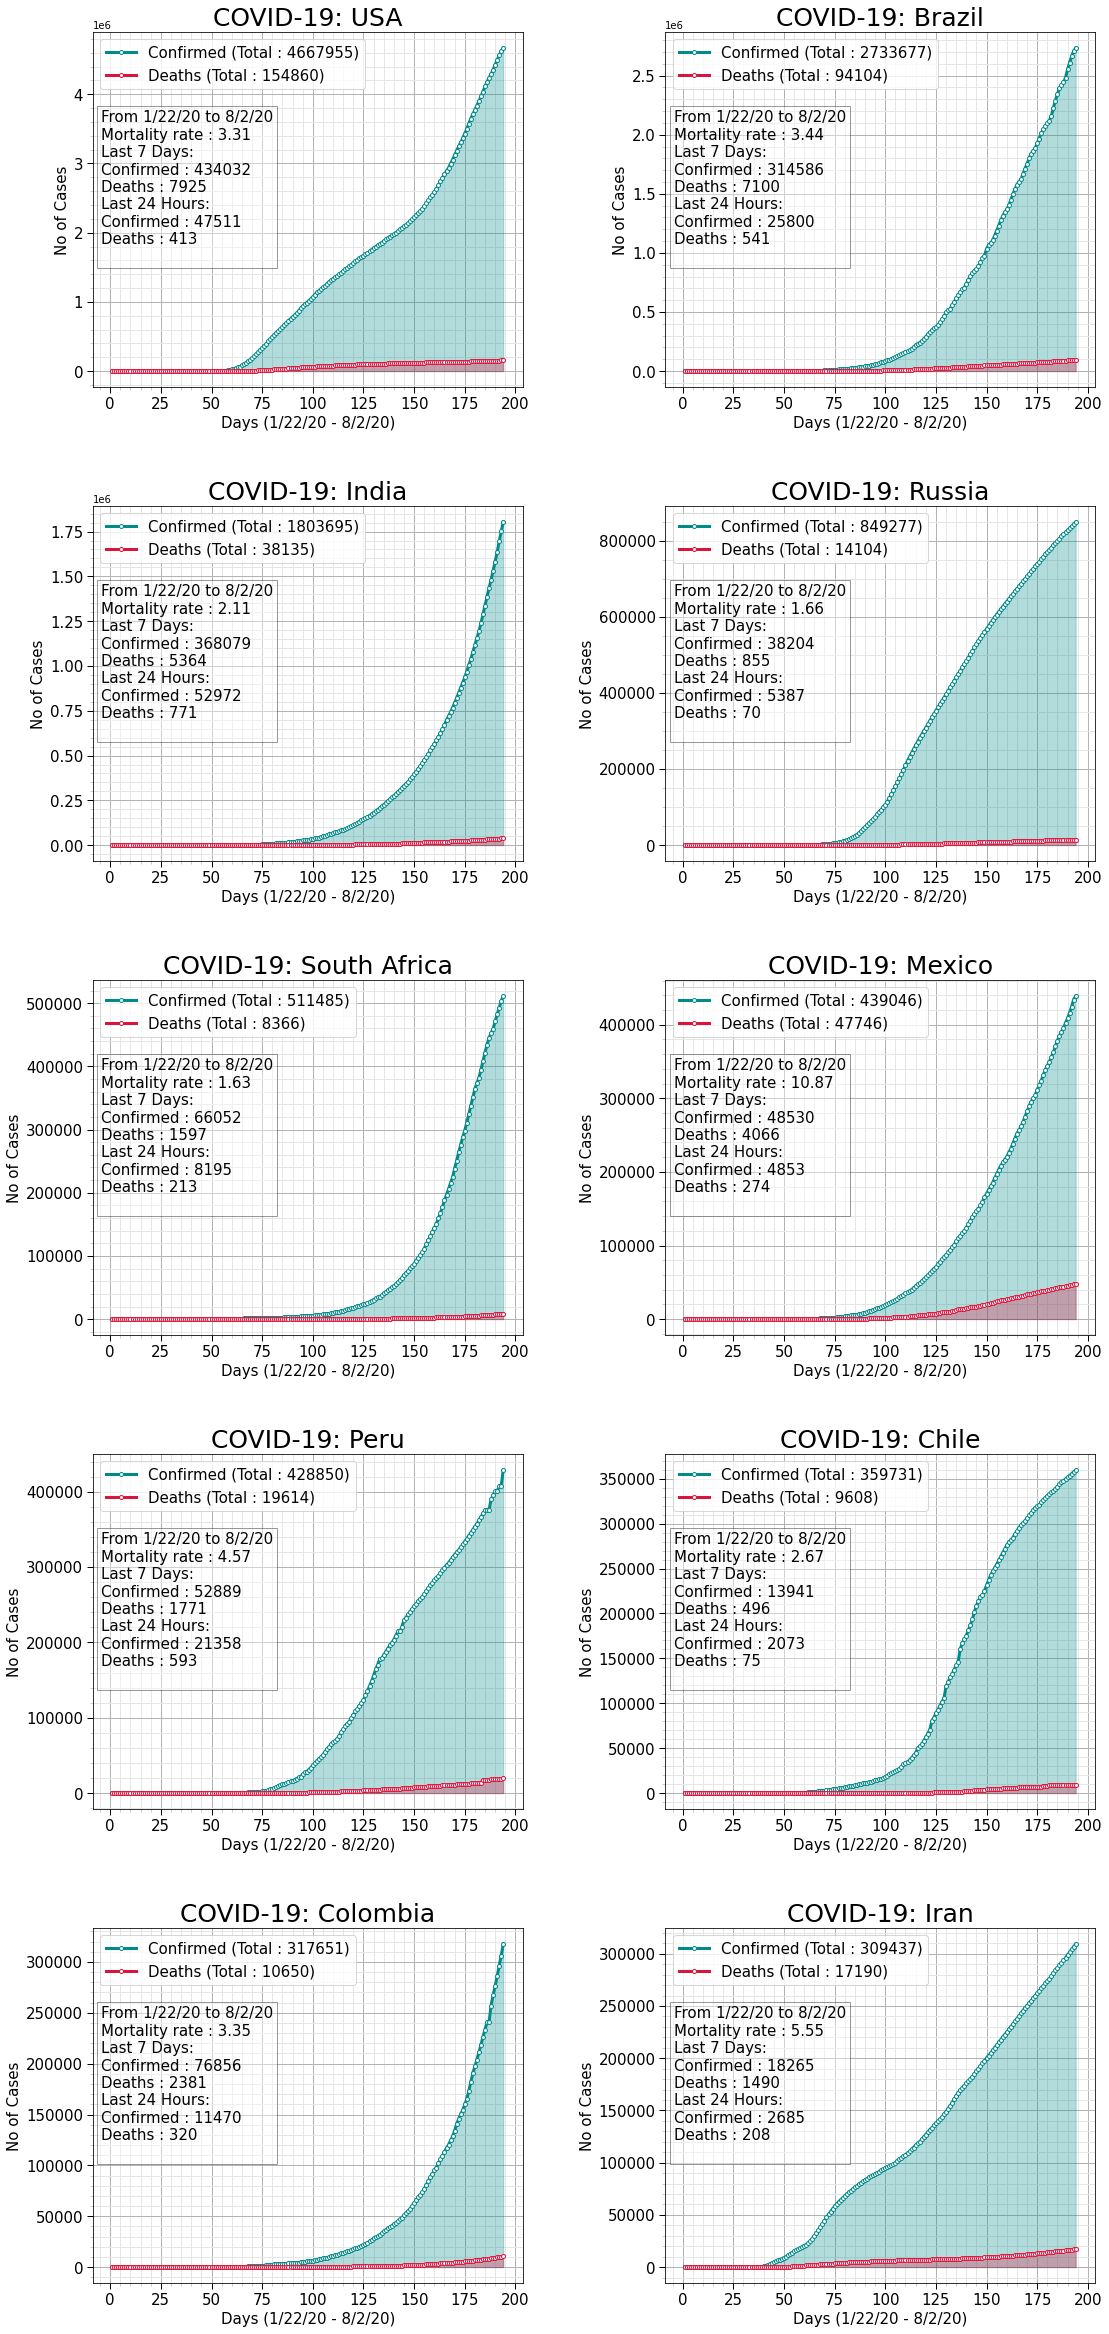

In [60]:
cols =2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(18,7*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(df_confirmed, df_deaths,country = country,figure = [f,rows,cols, i+1])

plt.show()

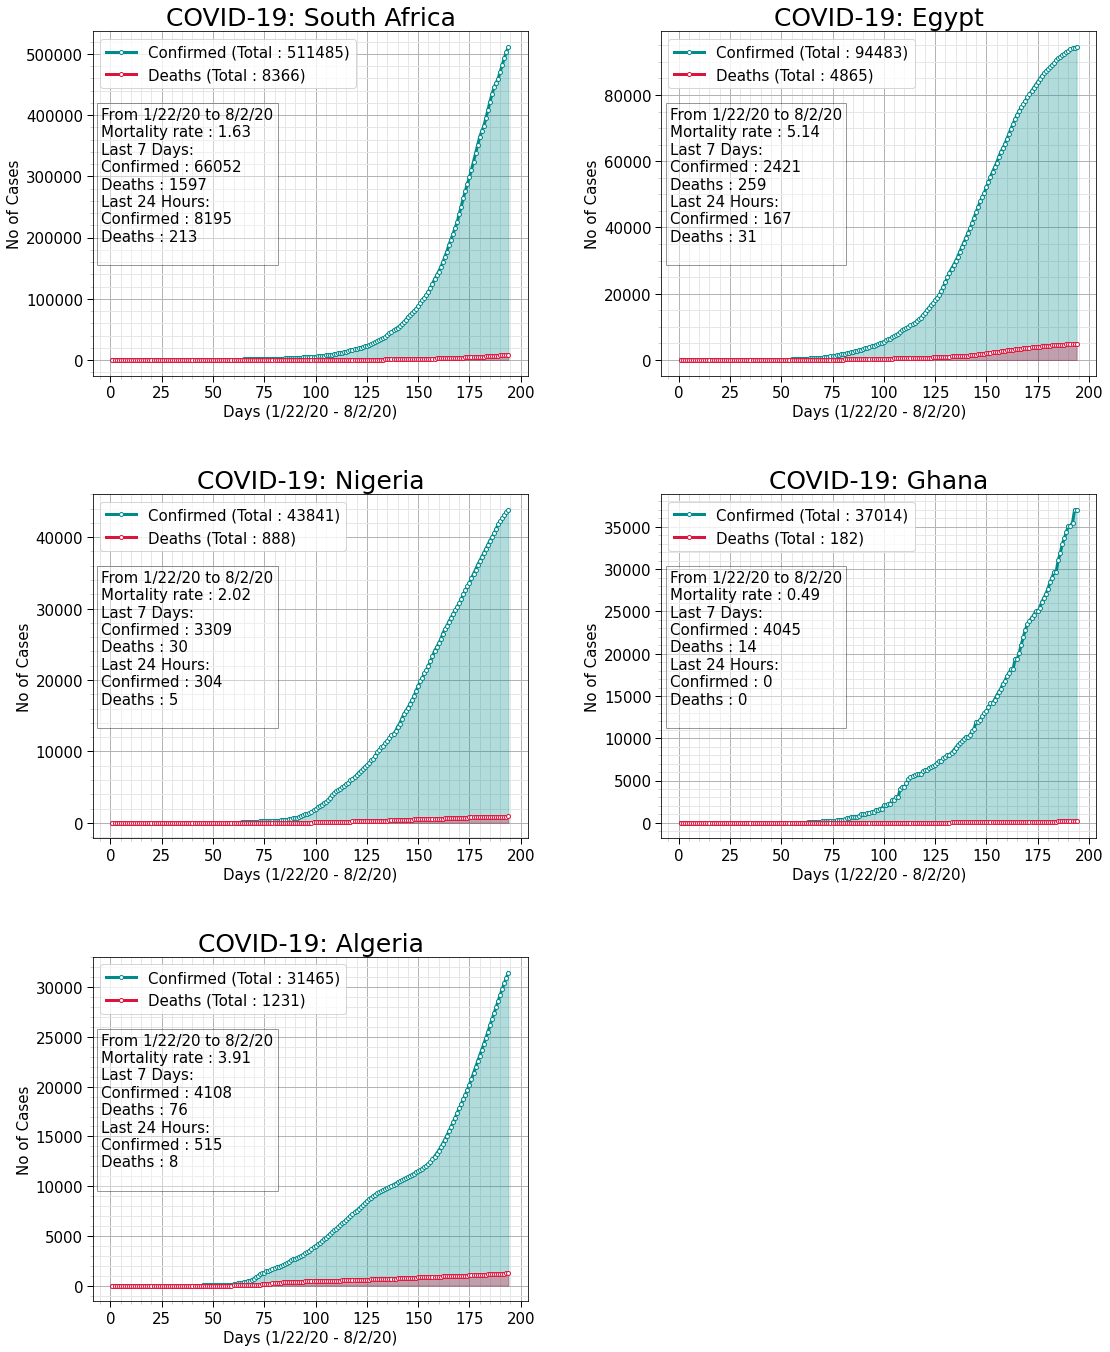

In [61]:
cols =2
rows = int(np.ceil(Top5africa.shape[0]/cols))
f = plt.figure(figsize=(18,7*rows))
for i,country in enumerate(Top5africa):
    visualize_covid_cases(df_confirmed, df_deaths,country = country,figure = [f,rows,cols, i+1])
plt.show()

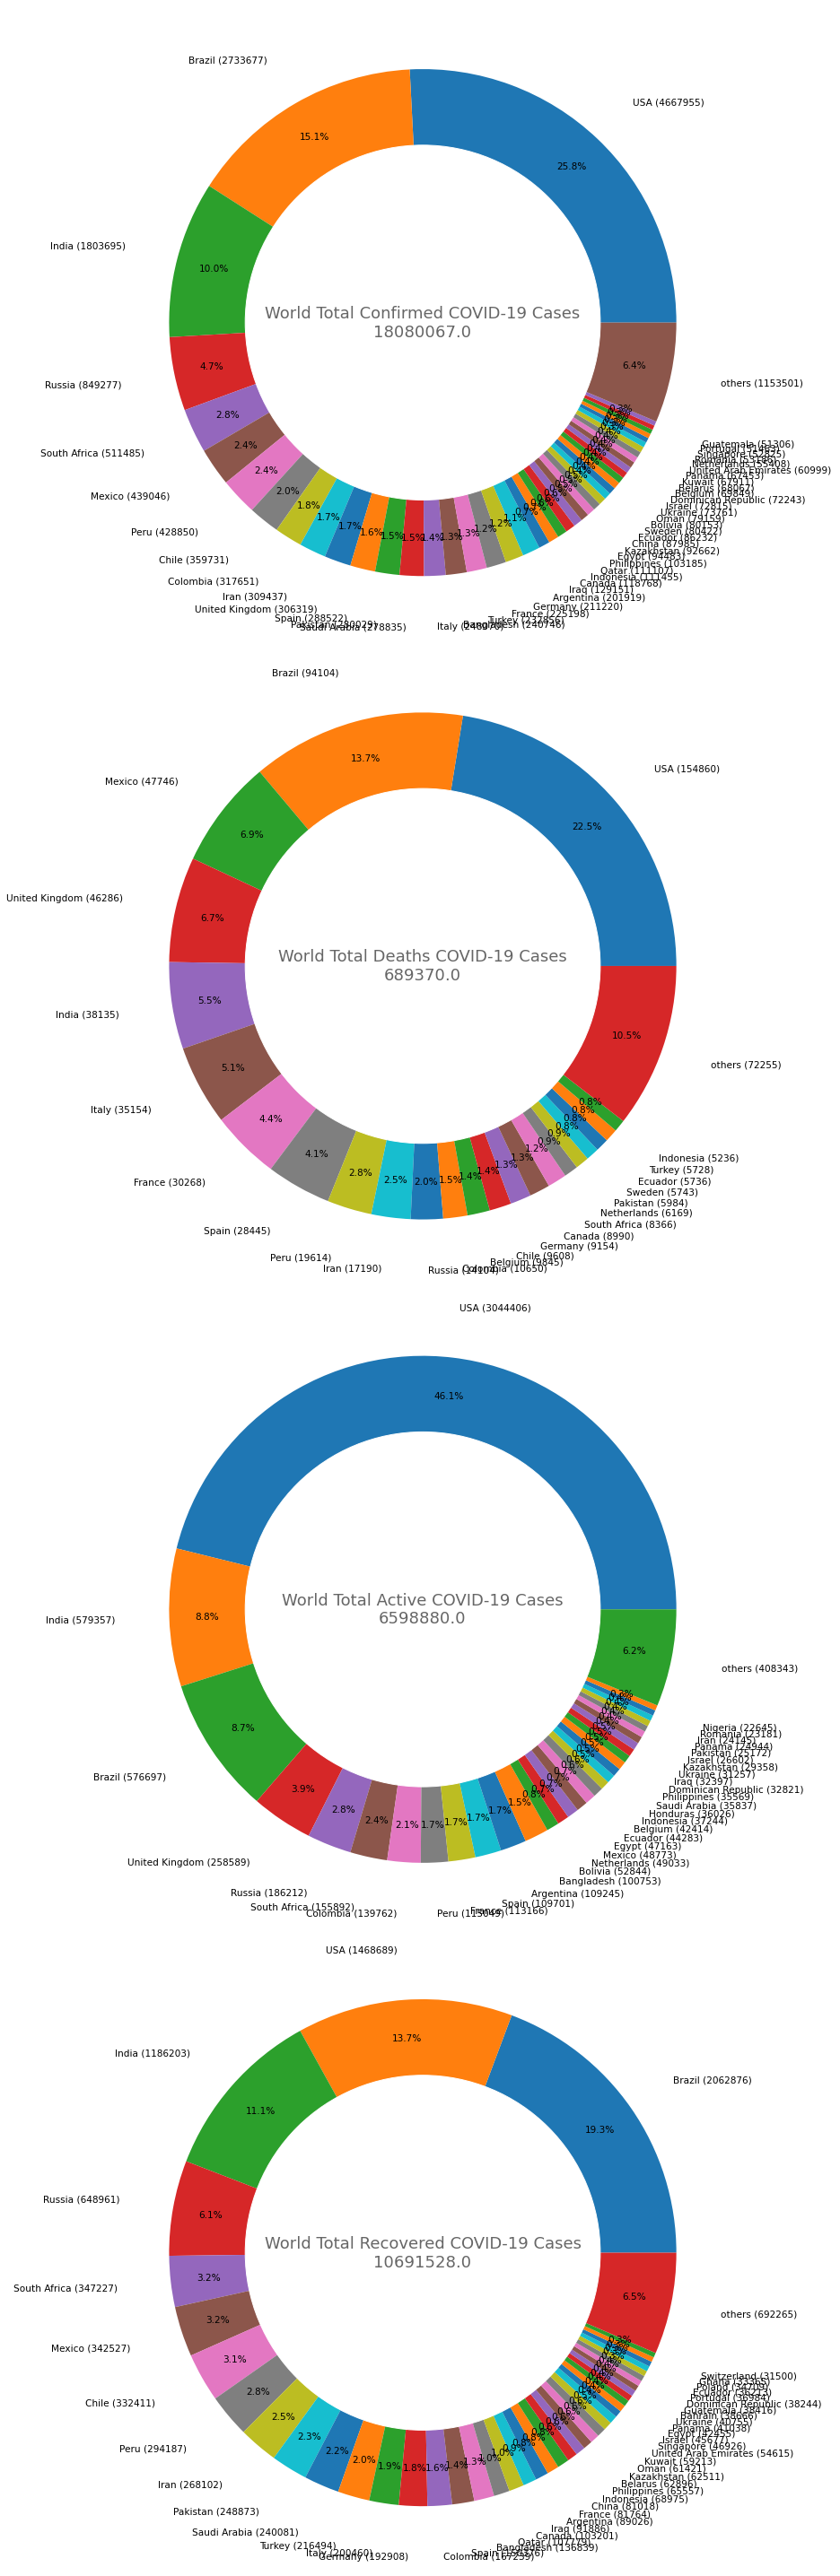

In [62]:
rows = 4
f = plt.figure(figsize=(15,10*rows))

stats = [df_covid19.loc[:,['country','Confirmed']],df_covid19.loc[:,['country','Deaths']],df_covid19.loc[:,['country','Active']],df_covid19.loc[:,['country','Recovered']]]
label = ["Confirmed","Deaths","Active","Recovered"]
threshold = [50000,5000,20000,30000]
for i, stat in enumerate(stats):
    plt.tight_layout()
    df_countries = stat.groupby(["country"]).sum()
    df_countries = df_countries.sort_values(df_countries.columns[-1],ascending= False)
    others = df_countries[df_countries[df_countries.columns[-1]] < threshold[i] ].sum()[-1]
    df_countries = df_countries[df_countries[df_countries.columns[-1]] > threshold[i]]
    df_countries = df_countries[df_countries.columns[-1]]
    df_countries["others"] = others
    labels = [df_countries.index[i] +" (" + str(int(df_countries[i])) +") "for i in range(df_countries.shape[0])]

    ax = f.add_subplot(rows,1,i+1)
    plt.pie(df_countries, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.2,textprops = {'fontsize':10.5})
    my_circle=plt.Circle( (0,0)
                         , 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.text(0.5,0.5,"World Total "+label[i]+ " COVID-19 Cases\n"+str(stat.sum().values[1]), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=18, alpha = 0.6)


plt.show()

In [63]:
[df_covid19.loc[:,['country','Confirmed']],df_covid19.loc[:,['country','Deaths']],df_covid19.loc[:,['country','Active']],df_covid19.loc[:,['country','Recovered']]]

[                country  Confirmed
 0             Australia    18318.0
 1               Austria    21304.0
 2                Canada   118768.0
 3                 China    87985.0
 4               Denmark    14028.0
 ..                  ...        ...
 183  West Bank and Gaza    12297.0
 184      Western Sahara       10.0
 185               Yemen     1734.0
 186              Zambia     6347.0
 187            Zimbabwe     3921.0
 
 [188 rows x 2 columns],
                 country  Deaths
 0             Australia   221.0
 1               Austria   718.0
 2                Canada  8990.0
 3                 China  4669.0
 4               Denmark   615.0
 ..                  ...     ...
 183  West Bank and Gaza    84.0
 184      Western Sahara     1.0
 185               Yemen   497.0
 186              Zambia   170.0
 187            Zimbabwe    70.0
 
 [188 rows x 2 columns],
                 country  Active
 0             Australia  7475.0
 1               Austria  1602.0
 2                C